<a href="https://colab.research.google.com/github/345bc/TriTueNhanTao/blob/main/BaiTapTuan5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bài 1

Done! Kmeans has converged after 3 times
Final centers: [[1.98586657 1.97794507]
 [9.02654316 1.93845443]
 [3.98088669 8.92468825]]


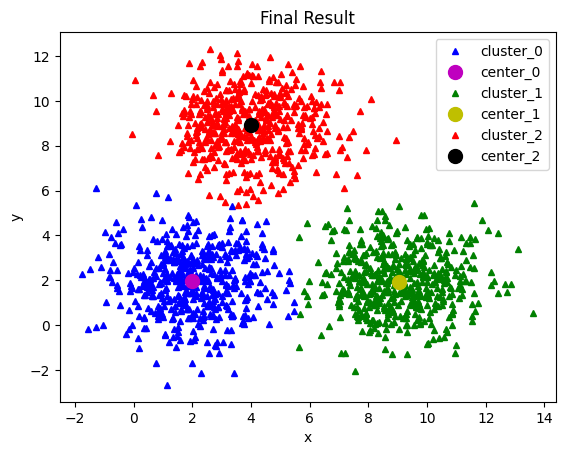

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

means = [[2, 2], [9, 2], [4, 9]]
cov = [[2, 0], [0, 2]]
n_samples = 500
n_cluster = 3
X0 = np.random.multivariate_normal(means[0], cov, n_samples)
X1 = np.random.multivariate_normal(means[1], cov, n_samples)
X2 = np.random.multivariate_normal(means[2], cov, n_samples)
X = np.concatenate((X0, X1, X2), axis=0)

def kmeans_init_centers(X, n_cluster):
    return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

def kmeans_predict_labels(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis=1)

def kmeans_update_centers(X, labels, n_cluster):
    centers = np.zeros((n_cluster, X.shape[1]))
    for k in range(n_cluster):
        Xk = X[labels == k, :]
        centers[k, :] = np.mean(Xk, axis=0)
    return centers

def kmeans_has_converged(centers, new_centers):
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

def kmeans_visualize(X, centers, labels, n_cluster, title):
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    for i in range(n_cluster):
        data = X[labels == i]
        plt.plot(data[:, 0], data[:, 1], plt_colors[i] + '^', markersize=4, label='cluster_' + str(i))
        plt.plot(centers[i][0], centers[i][1], plt_colors[i+4] + 'o', markersize=10, label='center_' + str(i))

    plt.legend()
    plt.show()

def kmeans(init_centers, init_labels, X, n_cluster):
    centers = init_centers
    labels = init_labels
    times = 0
    while True:
        labels = kmeans_predict_labels(X, centers)

        new_centers = kmeans_update_centers(X, labels, n_cluster)
        if kmeans_has_converged(centers, new_centers):
            break
        centers = new_centers
        times += 1
    return (centers, labels, times)

init_centers = kmeans_init_centers(X, n_cluster)
init_labels = np.zeros(X.shape[0])
centers, labels, times = kmeans(init_centers, init_labels, X, n_cluster)

print('Done! Kmeans has converged after', times, 'times')
print('Final centers:', centers)
kmeans_visualize(X, centers, labels, n_cluster, 'Final Result')

Bài 2

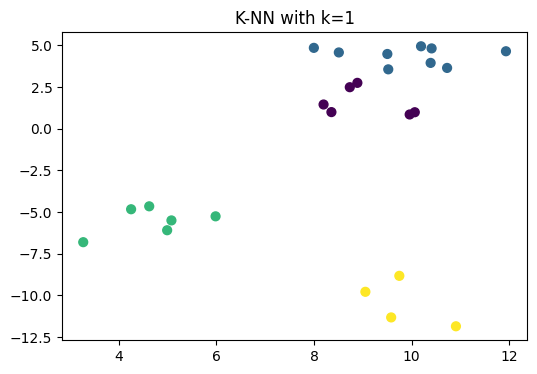

Đã vẽ biểu đồ cho k=1


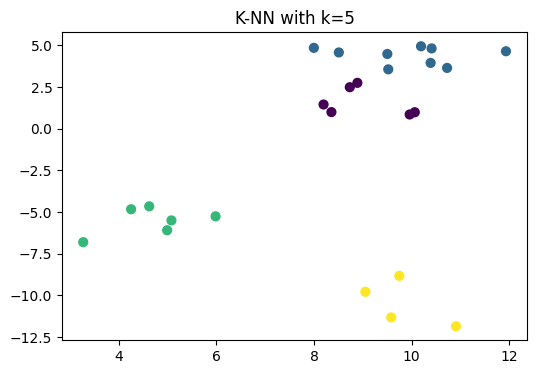

Đã vẽ biểu đồ cho k=5
Tham số k tốt nhất tìm được là: {'n_neighbors': np.int64(2)}


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

X, y = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=1, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

for k in [1, 5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    plt.figure(figsize=(6, 4))
    plt.title(f'K-NN with k={k}')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='o', s=40)
    plt.show()
    print(f"Đã vẽ biểu đồ cho k={k}")

knn_grid = GridSearchCV(estimator=KNeighborsClassifier(),
                        param_grid={'n_neighbors': np.arange(1, 10)},
                        cv=5)
knn_grid.fit(X, y)

print("Tham số k tốt nhất tìm được là:", knn_grid.best_params_)

Bài 3

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

def manual_KNN(X_train, X_test, y_train, k):
    num_test = X_test.shape[0]
    results = []

    for i in range(num_test):
        dist = np.sqrt(np.sum(np.power(X_test[i,:] - X_train, 2), axis=1))
        zipped = zip(dist, y_train)
        res = sorted(zipped, key=lambda x: x[0])
        results_topk = res[:k]
        classes = {}
        for _, j in results_topk:
            j = int(j)
            classes[j] = classes.get(j, 0) + 1
        results.append(max(classes, key=classes.get))
    return np.array(results)

(X, y) = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, random_state=4)
X_new = np.array([(1, 3)])
predicted_label = manual_KNN(X, X_new, y, k=3)

print(f"Điểm mới {X_new} được dự đoán thuộc nhóm: {predicted_label}")

Điểm mới [[1 3]] được dự đoán thuộc nhóm: [0]


## Demo ứng dụng K-Means và K-NN


--- K-Means Demo ---
K-Means đã hội tụ sau 3 lần lặp
Các tâm cụm cuối cùng của K-Means: [[-6.83120002 -6.75657544]
 [ 4.61416263  1.93184055]
 [-2.51336974  9.03492867]]


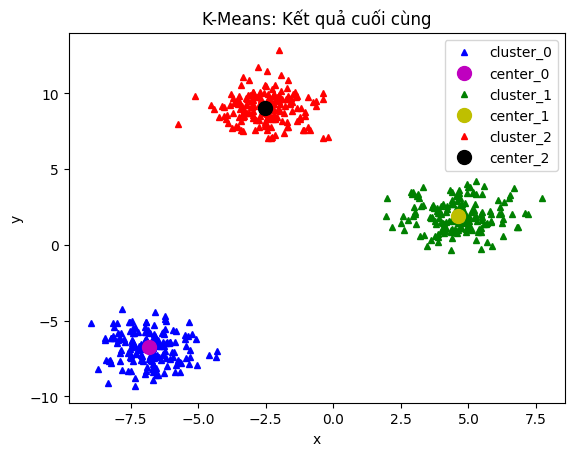


--- K-NN Demo ---
Điểm mới [[0 0]] được dự đoán thuộc nhóm: [3] với k=5


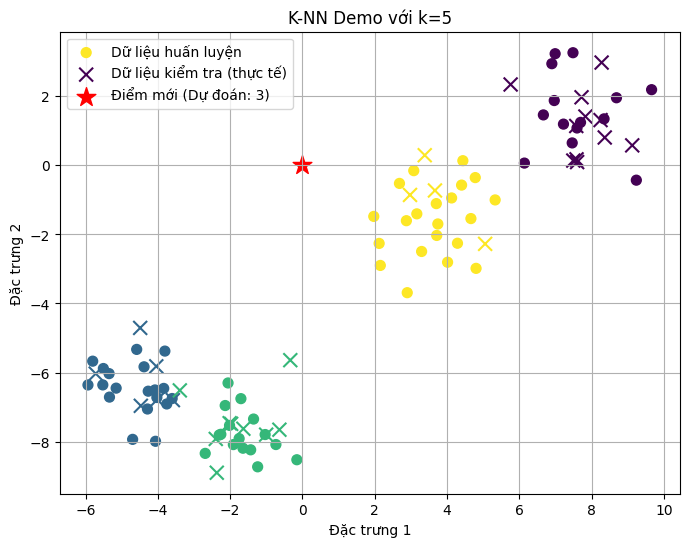

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist

print("\n--- K-Means Demo ---")
(X_kmeans, y_true_kmeans) = make_blobs(n_samples=500, n_features=2, centers=3, cluster_std=1.0, random_state=42)

n_cluster_kmeans = 3
init_centers_kmeans = kmeans_init_centers(X_kmeans, n_cluster_kmeans)
init_labels_kmeans = np.zeros(X_kmeans.shape[0])

centers_kmeans, labels_kmeans, times_kmeans = kmeans(init_centers_kmeans, init_labels_kmeans, X_kmeans, n_cluster_kmeans)

print(f'K-Means đã hội tụ sau {times_kmeans} lần lặp')
print('Các tâm cụm cuối cùng của K-Means:', centers_kmeans)
kmeans_visualize(X_kmeans, centers_kmeans, labels_kmeans, n_cluster_kmeans, 'K-Means: Kết quả cuối cùng')

print("\n--- K-NN Demo ---")
(X_knn, y_knn) = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.8, random_state=25)

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.3, random_state=42)

X_new_knn = np.array([[0, 0]])

k_value = 5
predicted_label_knn = manual_KNN(X_train_knn, X_new_knn, y_train_knn, k=k_value)

print(f"Điểm mới {X_new_knn} được dự đoán thuộc nhóm: {predicted_label_knn} với k={k_value}")

plt.figure(figsize=(8, 6))
plt.scatter(X_train_knn[:, 0], X_train_knn[:, 1], c=y_train_knn, marker='o', s=50, label='Dữ liệu huấn luyện')
plt.scatter(X_test_knn[:, 0], X_test_knn[:, 1], c=y_test_knn, marker='x', s=100, label='Dữ liệu kiểm tra (thực tế)')
plt.scatter(X_new_knn[:, 0], X_new_knn[:, 1], c='red', marker='*', s=200, label=f'Điểm mới (Dự đoán: {predicted_label_knn[0]})')
plt.title(f'K-NN Demo với k={k_value}')
plt.xlabel('Đặc trưng 1')
plt.ylabel('Đặc trưng 2')
plt.legend()
plt.grid(True)
plt.show()